# A/B Testing for Email Marketing

This is a dummy project by simulating a dataset to perform A/B testing.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Simulate 1000 emails sent for each subject line
data = {
    'Subject_Line': ['A'] * 1000 + ['B'] * 1000,
    'Opened': np.concatenate([
        np.random.binomial(1, 0.25, 1000),  # Version A: 25% open rate
        np.random.binomial(1, 0.30, 1000)   # Version B: 30% open rate
    ])
}

# Create DataFrame
df = pd.DataFrame(data)

# Display first 10 rows
print(df.head(10))


  Subject_Line  Opened
0            A       0
1            A       1
2            A       0
3            A       0
4            A       0
5            A       0
6            A       0
7            A       1
8            A       0
9            A       0


In [2]:
df


,Subject_Line,Opened
0,A,0
1,A,1
2,A,0
3,A,0
4,A,0
...,...,...
1995,B,0
1996,B,1
1997,B,0
1998,B,0


In [3]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Count open rates for each subject line
open_rates = df.groupby('Subject_Line')['Opened'].mean() * 100
print("\nOpen Rates:\n", open_rates)


Missing Values:
 Subject_Line    0
Opened          0
dtype: int64

Open Rates:
 Subject_Line
A    24.3
B    30.7
Name: Opened, dtype: float64


In [4]:
# We use a Chi-Square test to determine if the difference in open rates between the subject lines is statistically significant.

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Subject_Line'], df['Opened'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display Results
print("\nChi-Square Statistic:", chi2)
print("P-value:", p)

# Decision Rule
alpha = 0.05
if p < alpha:
    print("Conclusion: Reject Null Hypothesis – A significant difference exists between the subject lines.")
else:
    print("Conclusion: Fail to Reject Null Hypothesis – No significant difference between the subject lines.")



Chi-Square Statistic: 9.953605015673983
P-value: 0.001605347242370494
Conclusion: Reject Null Hypothesis – A significant difference exists between the subject lines.


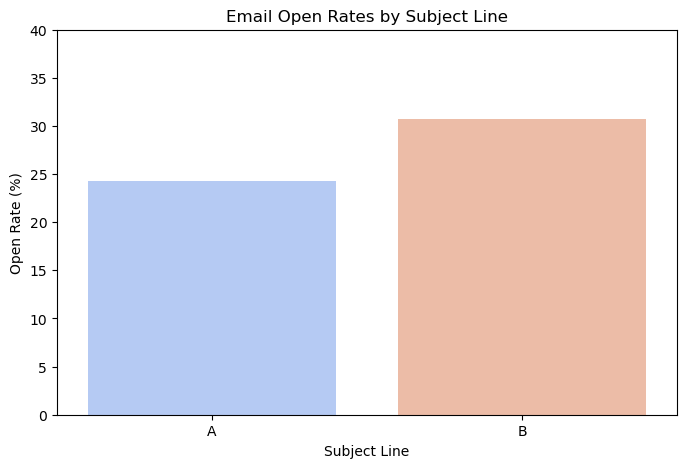

In [5]:

# Create a bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=open_rates.index, y=open_rates.values, palette="coolwarm")

# Add labels
plt.title("Email Open Rates by Subject Line")
plt.xlabel("Subject Line")
plt.ylabel("Open Rate (%)")
plt.ylim(0, 40)

# Show plot
plt.show()


### Since p-value < 0.05, we conclde that subject line B performs significantly better than A.  Therefore, the company can use similar subject lines in future marketing campaigns.